# Info
: 각 언론사들의 정권별로 기사 title에 쓰인 word들을 이용해 d2v(언론사를 doc으로 하여)을 실행해 정권별로 언론사들이 어떻게 위치하는지 확인해본다.

In [44]:
import pandas as pd
import glob

file_name = glob.glob('../article/headline_noun_keyword*')

keyword_df = []
for file in file_name:
    df = pd.read_pickle(file)
    keyword_df.append(df)

keyword_all = pd.concat(keyword_df, ignore_index = True)
keyword = keyword_all[keyword_all['week'] <= 807]
keyword

,date,co,headline,week,pos
0,2015.08.09. 오후 11:59,머니투데이,미연준 금리 인상 예고 은행별 주택아파트담보대출 사이트로 해법 찾기,501,"[미연, 금리, 인상, 예고, 은행, 주택, 아파트, 담보, 대출, 사이트, 해법]"
1,2015.08.09. 오후 9:52,경향신문,지방 주택시장 과열 양상… 대구 1년 새 집값 11% 올라,501,"[지방, 주택, 시장, 과열, 양상, 대구, 년, 집값]"
2,2015.08.09. 오후 8:51,세계일보,전세 시황 계절 요인에… 치솟던 전세가 상승폭 주춤,501,"[전세, 시황, 계절, 요인, 전세, 상승, 폭]"
3,2015.08.09. 오후 8:51,세계일보,매매 시황 가계부채 대책 후폭풍… 매매가 상승 둔화,501,"[매매, 시황, 가계, 부채, 대책, 후폭풍, 매매, 상승, 둔화]"
4,2015.08.09. 오후 8:49,세계일보,너무 뜨거운 부동산 시장… 손 델라,501,"[부동산, 시장, 손]"
...,...,...,...,...,...
1067224,2015.08.08. 오전 12:02,서울경제,배후수요 풍부 향후 미래가치가 기대되는 천안 레이크타운2차 푸르지오 분양,500,"[배후, 수요, 풍부, 향후, 미래, 가치, 기대, 천안, 레이크, 타운, 차, 푸..."
1067225,2015.08.08. 오전 12:02,헤럴드경제,일산아이파크 수도권미분양아파트 모래알 진주찾기,500,"[일산, 아이파크, 수도, 미분양, 아파트, 모래알, 진주]"
1067226,2015.08.08. 오전 12:02,헤럴드경제,봉담 코오롱 하늘채 편리한 교통 및 우수한 교육환경 자랑,500,"[봉담, 코오롱, 하늘, 편리, 교통, 우수, 교육, 환경, 자랑]"
1067227,2015.08.08. 오전 12:00,경향신문,대명리조트 콘도 회원권으로 여름 휴가 알차게 보내는 방법,500,"[대명, 리조트, 콘, 회원, 여름, 휴가, 방법]"


In [45]:
df = pd.read_pickle("../article/selected_company_article.pkl")
origin_now_co = list(set(df['co']))

In [47]:
df = df.groupby(['co','week'])['pos'].sum()

In [48]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

documents = [TaggedDocument(df[doc].sum(), [doc]) for i,doc in enumerate(origin_now_co)]
model = Doc2Vec(documents, vector_size=100, window=5, min_count=1000, workers=4, epochs=10)

2021-11-26 04:53:06,740 : INFO : collecting all words and their counts
2021-11-26 04:53:06,741 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2021-11-26 04:53:07,692 : INFO : collected 43782 word types and 20 unique tags from a corpus of 20 examples and 5834453 words
2021-11-26 04:53:07,694 : INFO : Creating a fresh vocabulary
2021-11-26 04:53:07,709 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1000 retains 971 unique words (2.2178064044584533%% of original 43782, drops 42811)', 'datetime': '2021-11-26T04:53:07.709683', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 19:58:26) \n[GCC 7.3.0]', 'platform': 'Linux-5.4.0-84-generic-x86_64-with-glibc2.10', 'event': 'prepare_vocab'}
2021-11-26 04:53:07,710 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1000 leaves 4199801 word corpus (71.98277199250727%% of original 5834453, drops 1634652)', 'datetime': '2021-11-26T04:53:07.710706', 'gensim': '4.1.2', 'python': '3.8.

In [49]:
from gensim.test.utils import get_tmpfile

fname = get_tmpfile("article_doc2vec_model")

model.save(fname)
model = Doc2Vec.load(fname)

2021-11-26 04:53:10,519 : INFO : Doc2Vec lifecycle event {'fname_or_handle': '/tmp/tmp4ht_q1zk/article_doc2vec_model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-11-26T04:53:10.519234', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 19:58:26) \n[GCC 7.3.0]', 'platform': 'Linux-5.4.0-84-generic-x86_64-with-glibc2.10', 'event': 'saving'}
2021-11-26 04:53:10,520 : INFO : not storing attribute cum_table
2021-11-26 04:53:10,522 : INFO : saved /tmp/tmp4ht_q1zk/article_doc2vec_model
2021-11-26 04:53:10,523 : INFO : loading Doc2Vec object from /tmp/tmp4ht_q1zk/article_doc2vec_model
2021-11-26 04:53:10,525 : INFO : loading dv recursively from /tmp/tmp4ht_q1zk/article_doc2vec_model.dv.* with mmap=None
2021-11-26 04:53:10,525 : INFO : loading wv recursively from /tmp/tmp4ht_q1zk/article_doc2vec_model.wv.* with mmap=None
2021-11-26 04:53:10,526 : INFO : setting ignored attribute cum_table to None
2021-11-26 04:53:10,538 : INFO : Doc2Vec lifecy

In [50]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=12)

In [51]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

labels = []
tokens = []
words_dv = list(model.dv.index_to_key)
words_wv = list(model.wv.index_to_key)
for word in words_dv:
    tokens.append(model.dv[word])
    labels.append(word)
for word in words_wv:
    tokens.append(model.wv[word])
    labels.append(word)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

/home/younggyu/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/younggyu/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/ba

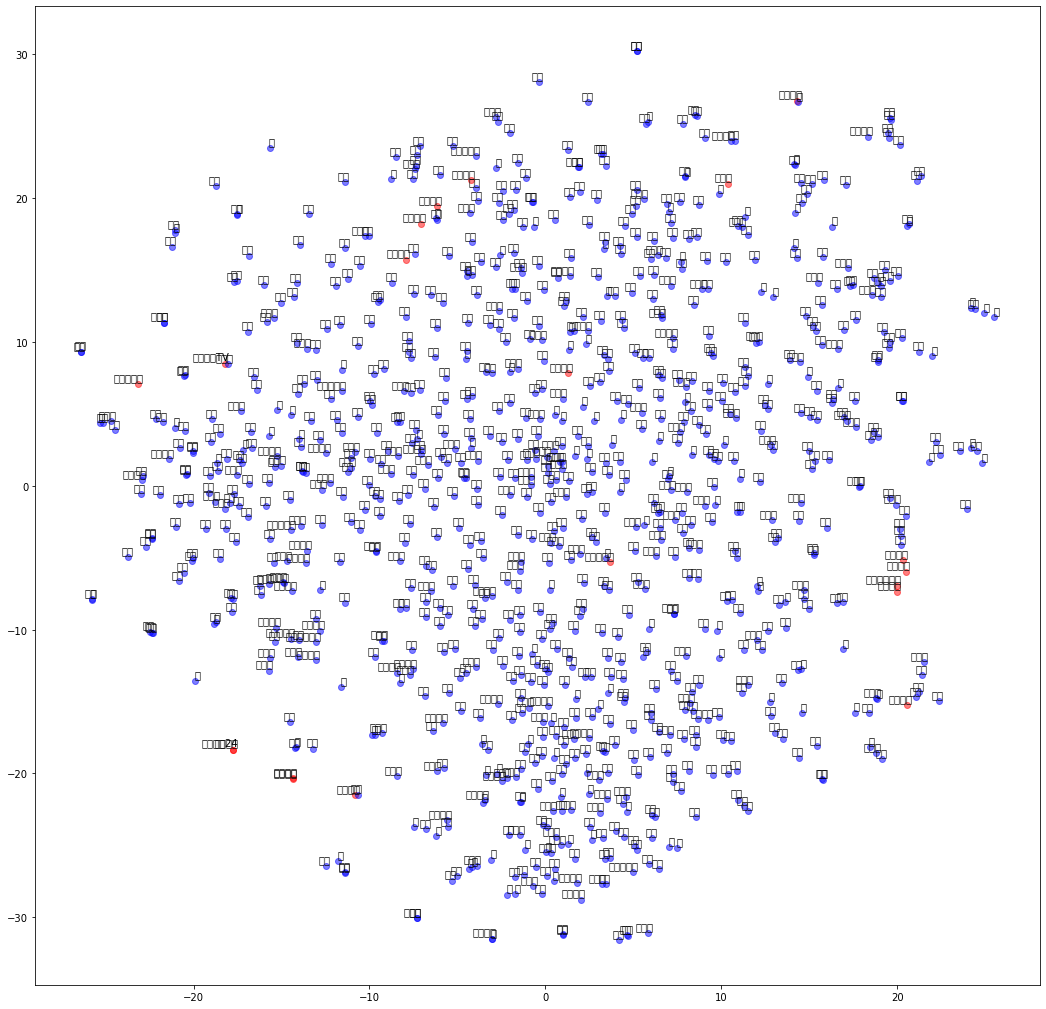

In [52]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(18, 18)) 
for i in range(len(x)):
    if labels[i] in words_dv:
        if labels[i] in origin_now_co:
            color='r'
        else:
            color='k'
    else:
        color='b'
    plt.scatter(x[i],y[i], color = color,alpha = 0.5)
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom', )

plt.show()

In [53]:
import umap
reducer = umap.UMAP()

In [54]:
tokens[0]

array([-0.78388786, -0.6549385 , -1.3207345 ,  0.9293319 ,  0.416985  ,
       -0.50174344, -1.808947  , -0.9087549 , -2.0489693 , -0.2350522 ,
       -0.56910497,  0.37052038, -0.12486299,  0.2739796 , -1.1309311 ,
       -0.8283496 , -0.09997239,  1.1585004 , -0.38933486, -1.7071058 ,
        0.38004494, -0.08256204, -1.0917857 , -0.22436391,  1.3178732 ,
       -1.7107532 , -1.3695846 , -0.53987473,  1.1295099 , -2.2981858 ,
        0.06724261,  0.87519467, -1.1841463 , -1.8054813 ,  0.34850204,
       -0.19970994,  0.8922926 ,  0.37829533, -0.3501579 ,  1.3309386 ,
        0.01960067, -1.034318  ,  0.20661213,  0.34503302,  1.0954154 ,
       -1.1787565 ,  0.15555161, -1.3622543 ,  1.9295363 , -0.16886015,
       -0.23699988, -0.6586078 ,  0.6813557 , -1.1159335 , -0.70731705,
       -0.3405198 , -0.500884  ,  0.06254052, -1.7956679 ,  0.06632672,
       -0.08614748, -0.09296652,  0.07109098, -0.6701719 ,  0.35295156,
       -1.4468712 ,  0.26676252,  0.82500964,  0.44436243, -0.95

In [55]:
embedding = reducer.fit_transform(tokens)
embedding.shape

(991, 2)

In [56]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[embedding[i,0],embedding[i,1]] for i in range(20)])
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.labels_

array([1, 0, 3, 1, 2, 3, 0, 1, 2, 3, 1, 2, 2, 1, 0, 3, 1, 3, 2, 1],
      dtype=int32)

In [57]:
company = {0:[],1:[],2:[],3:[]}

for i,c in enumerate(kmeans.labels_):
    company[c].append(labels[i])

company

{0: ['강원일보', '한겨레', '동아일보'],
 1: ['매일경제', '머니투데이', '세계일보', '서울경제', '한국경제', '헤럴드경제', '파이낸셜뉴스'],
 2: ['연합뉴스', '이데일리', '경향신문', '한국경제TV', '노컷뉴스'],
 3: ['아이뉴스24', '국민일보', '매일신문', '문화일보', '데일리안']}

In [58]:
for i in range(4):
    print(f'cluster {i}')
    for co in company[i]:
        print(co,keyword[keyword['co'] == co].count()[0])

cluster 0
강원일보 3135
한겨레 6004
동아일보 26748
cluster 1
매일경제 111656
머니투데이 76920
세계일보 24205
서울경제 53151
한국경제 70121
헤럴드경제 63949
파이낸셜뉴스 96791
cluster 2
연합뉴스 50657
이데일리 78315
경향신문 17761
한국경제TV 64141
노컷뉴스 9496
cluster 3
아이뉴스24 7103
국민일보 4518
매일신문 2017
문화일보 3651
데일리안 14029


/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/back

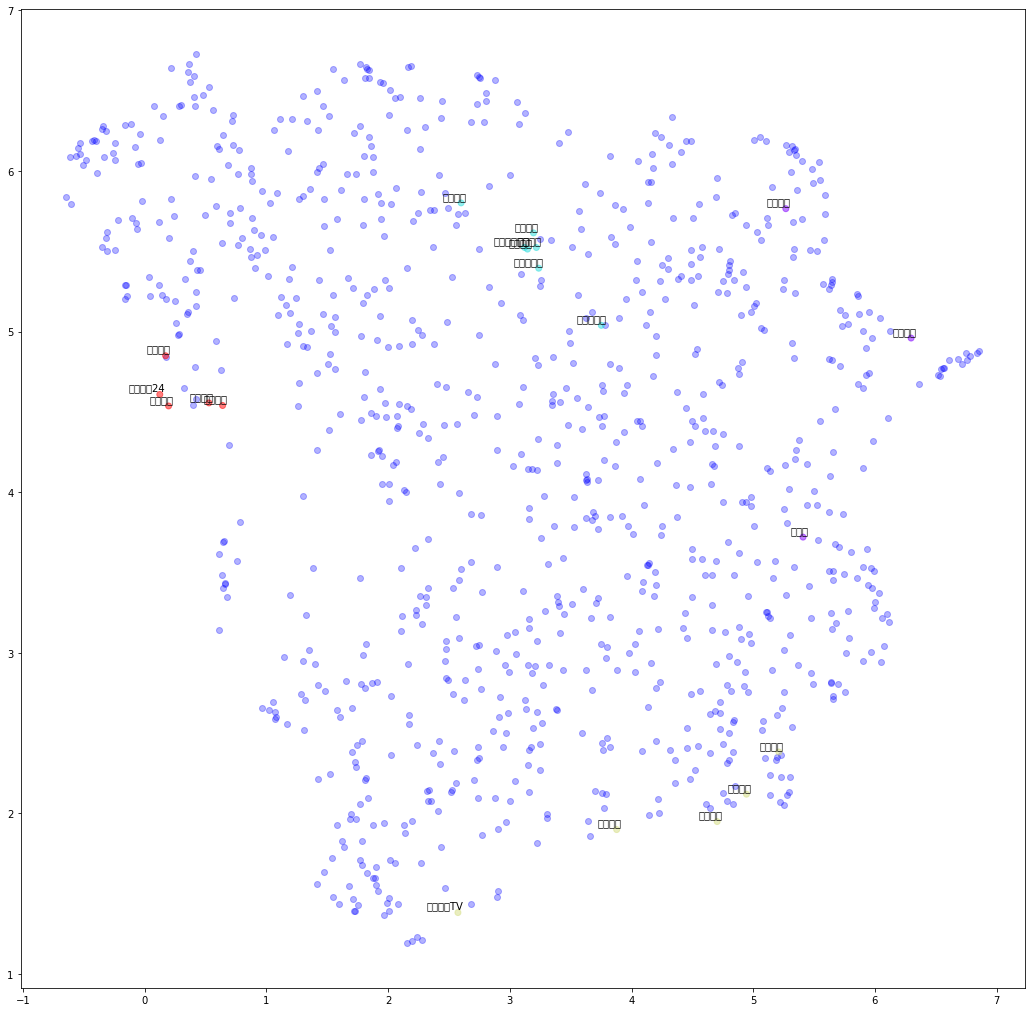

In [59]:
plt.figure(figsize=(18, 18)) 
for i in range(len(x)):
    if labels[i] in words_wv:
        color='b'
        plt.scatter(embedding[i,0],embedding[i,1], color = color, alpha=0.3)

X = embedding[:20,0]
Y = embedding[:20,1]
L = labels[:20]
C = list(kmeans.labels_)

plt.scatter(X,Y, c=C, cmap=plt.cm.rainbow, alpha=0.5)

for i in range(20):
    plt.annotate(labels[i],
                 xy=(embedding[i,0],embedding[i,1]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom', )
plt.savefig('./word_embedding_umap.png')

In [60]:
kmeans.cluster_centers_

array([[5.6584187 , 4.8146505 ],
       [3.181171  , 5.4866705 ],
       [4.262201  , 1.9463074 ],
       [0.33162117, 4.617709  ]], dtype=float32)

In [61]:
from datetime import date
start_date = date(2006,1,1)
mh = date(2008,2,24)
mb = date(2013,2,24)
gh = date(2016,12,9)
ga = date(2017,5,10) #황교안 대행
ji = date(2022,5,9)
mhw = (mh - start_date).days//7
mbw = (mb - start_date).days//7
ghw = (gh - start_date).days//7
gaw = (ga - start_date).days//7
jiw = (ji - start_date).days//7

In [62]:
gov = ['mh','mb','gh','ji']

In [63]:
time_range = {}
time_range['mh'] = (0,mhw)
time_range['mb'] = (mhw,mbw)
time_range['gh'] = (mbw,ghw)
#time_range['ga'] = (ghw,gaw)
time_range['ji'] = (gaw,808)

In [64]:
df = keyword

In [65]:
gov_article = {}
for g in gov:
    week_s, week_e = time_range[g]
    gov_article[g] = df[(df['week'] >= week_s) & (df['week'] < week_e)].groupby(['co','week'])['pos'].sum()

In [66]:
model = {}
for g in gov:
    documents = [TaggedDocument(gov_article[g][doc].sum(), [doc]) for i,doc in enumerate(origin_now_co)]
    model[g] = Doc2Vec(documents, vector_size=100, window=5, min_count=300, workers=4, epochs=10)

2021-11-26 04:54:00,252 : INFO : collecting all words and their counts
2021-11-26 04:54:00,253 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2021-11-26 04:54:00,313 : INFO : collected 14496 word types and 20 unique tags from a corpus of 20 examples and 401416 words
2021-11-26 04:54:00,314 : INFO : Creating a fresh vocabulary
2021-11-26 04:54:00,318 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=300 retains 223 unique words (1.538355408388521%% of original 14496, drops 14273)', 'datetime': '2021-11-26T04:54:00.318905', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 19:58:26) \n[GCC 7.3.0]', 'platform': 'Linux-5.4.0-84-generic-x86_64-with-glibc2.10', 'event': 'prepare_vocab'}
2021-11-26 04:54:00,319 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=300 leaves 207332 word corpus (51.6501584391255%% of original 401416, drops 194084)', 'datetime': '2021-11-26T04:54:00.319907', 'gensim': '4.1.2', 'python': '3.8.8 (defau

In [67]:
labels = {}
tokens = {}
words_dv = {}
words_wv = {}
for g in gov:
    labels[g] = []
    tokens[g] = []
    words_dv[g] = list(model[g].dv.index_to_key)
    words_wv[g] = list(model[g].wv.index_to_key)
    for word in words_dv[g]:
        tokens[g].append(model[g].dv[word])
        labels[g].append(word)
    for word in words_wv[g]:
        tokens[g].append(model[g].wv[word])
        labels[g].append(word)

In [68]:
embedding = {}
for g in gov:
    embedding[g] = reducer.fit_transform(tokens[g])
    print(embedding[g].shape)

(243, 2)
(747, 2)
(986, 2)
(1222, 2)


In [69]:
kmeans = {}
for g in gov:
    X = np.array([[embedding[g][i,0],embedding[g][i,1]] for i in range(20)])
    kmeans[g] = KMeans(n_clusters=4, random_state=0).fit(X)
    print(kmeans[g].labels_)

[3 0 0 2 0 1 1 1 2 1 3 1 1 0 1 1 2 0 0 0]
[1 0 0 2 1 0 0 3 2 1 0 3 2 3 3 0 1 1 2 2]
[3 3 2 1 1 2 2 0 1 3 0 2 1 3 0 3 0 2 2 1]
[0 0 2 2 0 3 3 0 2 0 0 3 1 1 1 3 0 2 3 2]


/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/younggyu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/back

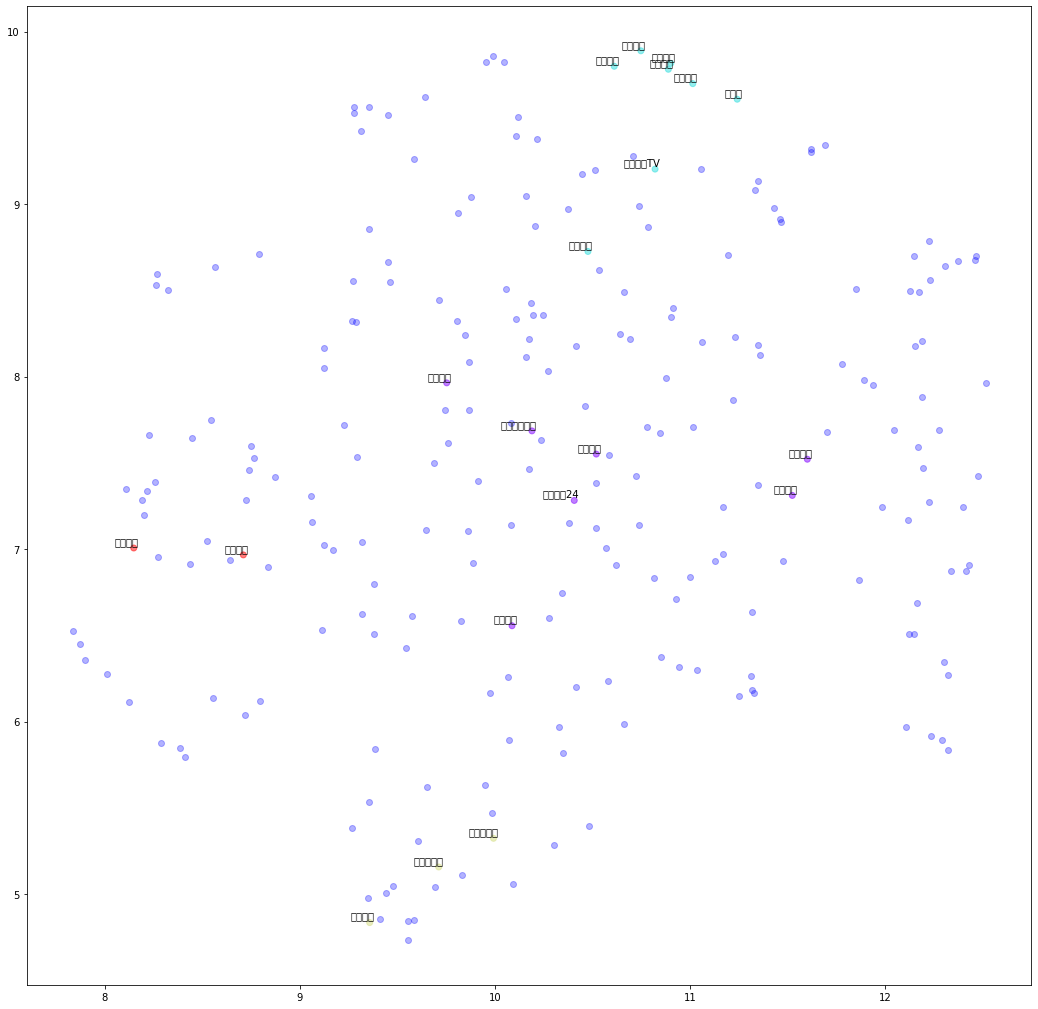

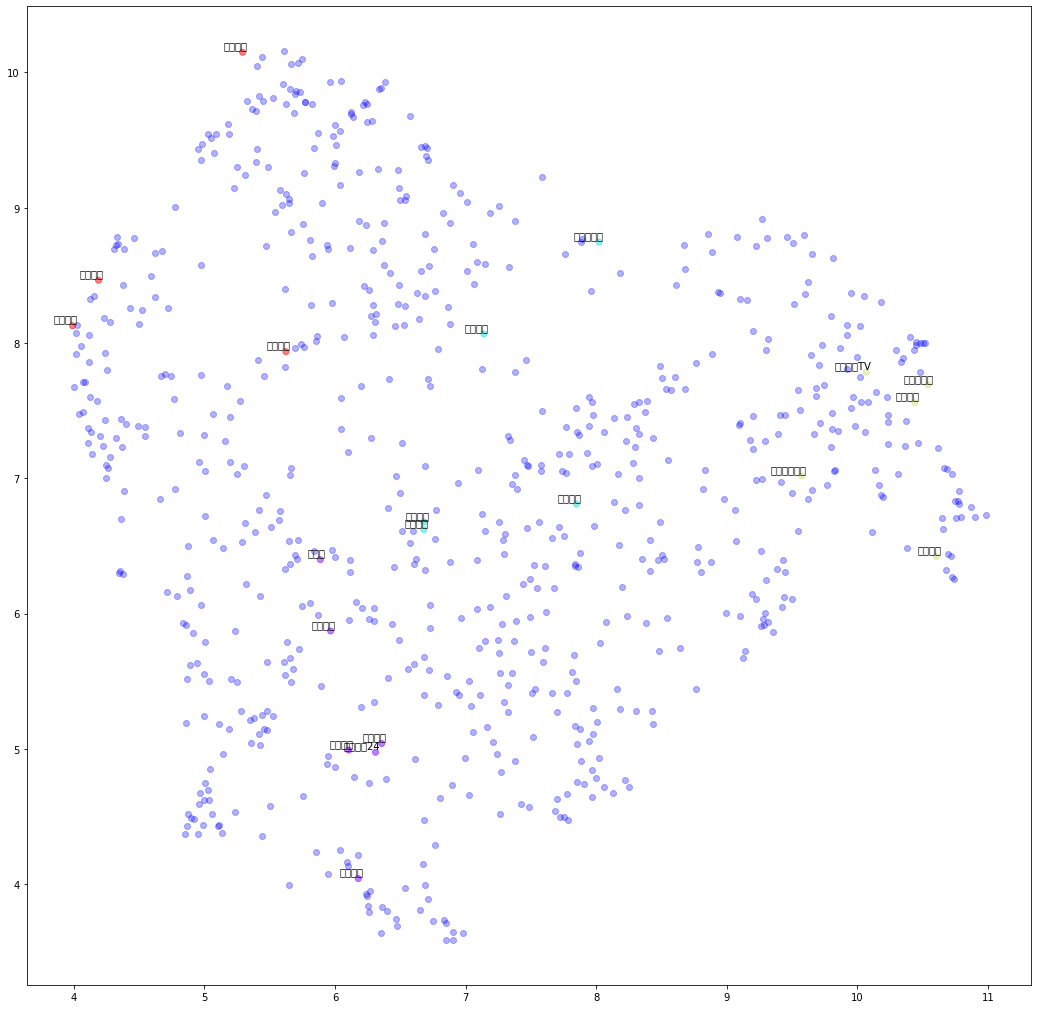

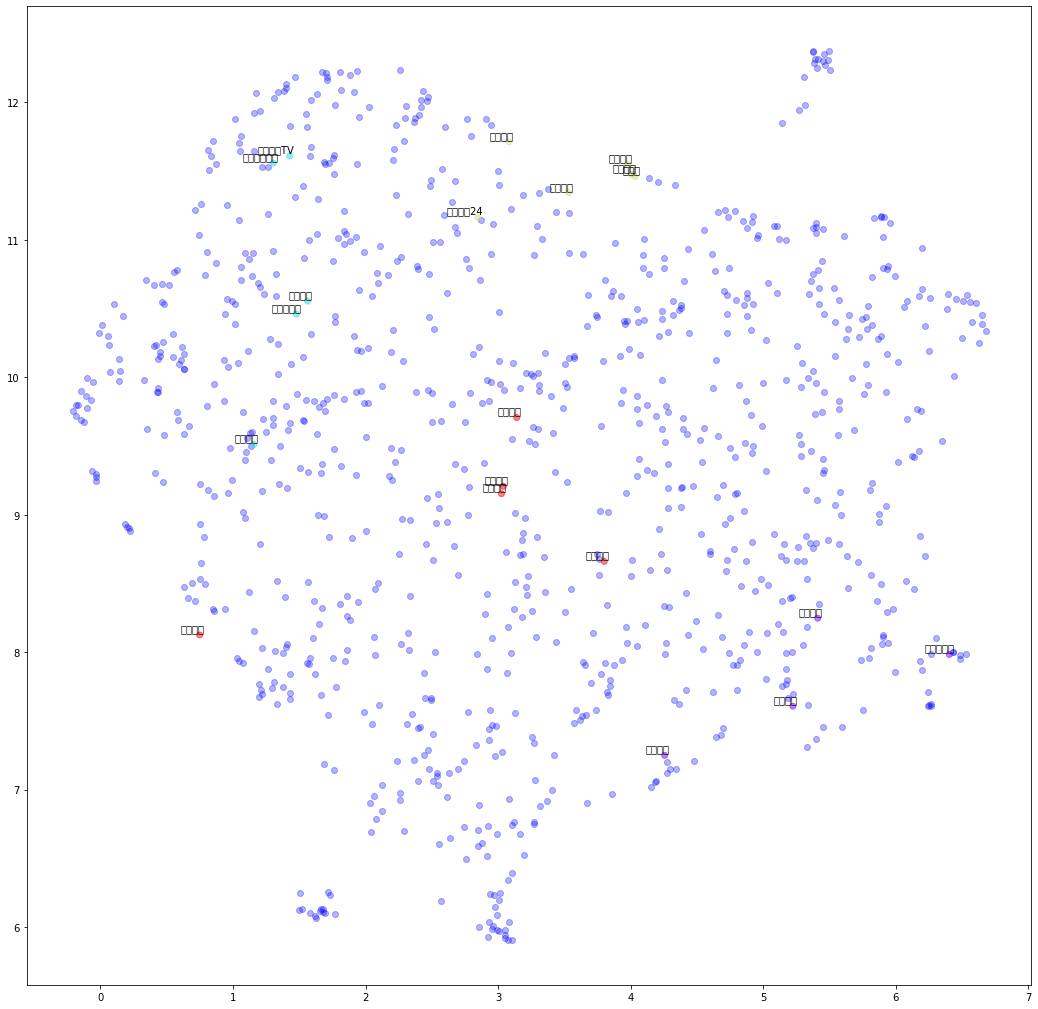

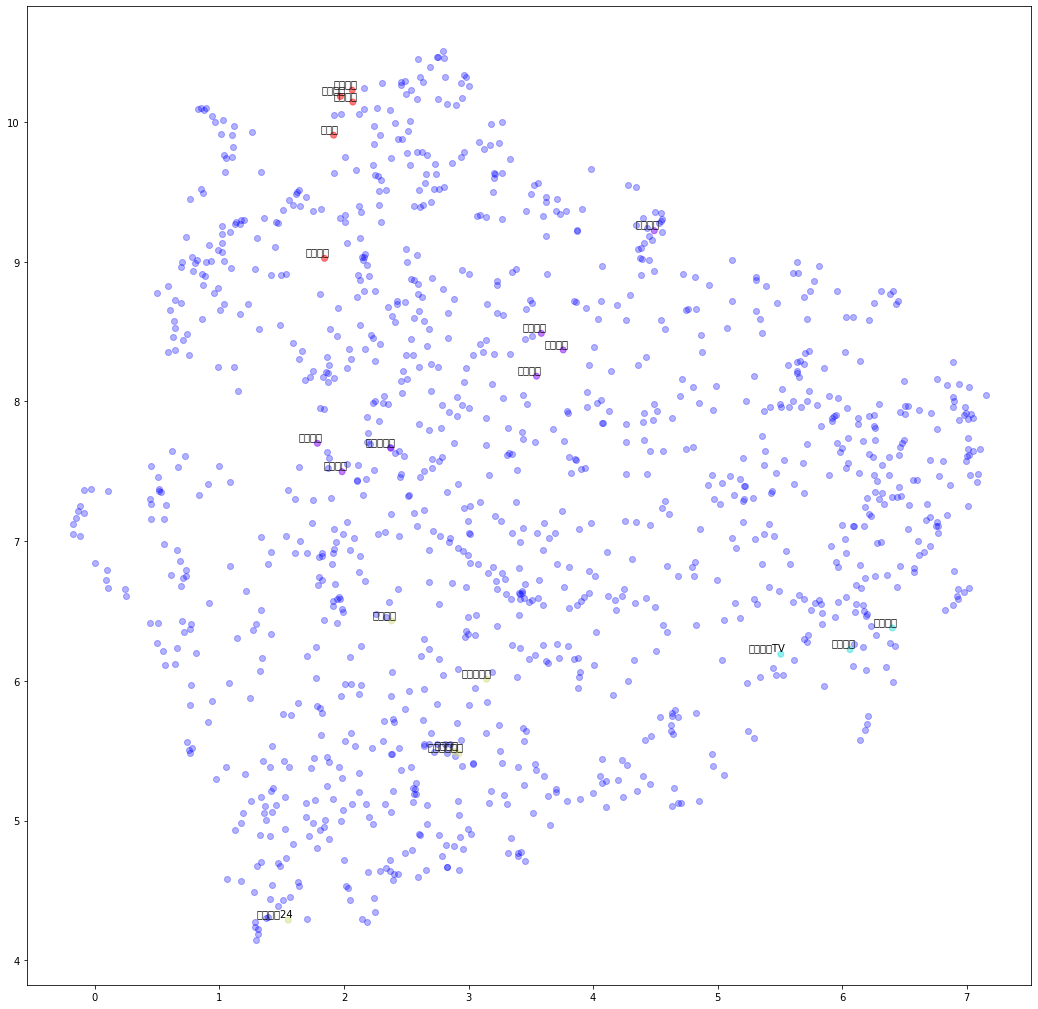

In [70]:
for g in gov:
    plt.figure(figsize=(18, 18)) 
    for i in range(embedding[g].shape[0]):
        if labels[g][i] in words_wv[g]:
            color='b'
            plt.scatter(embedding[g][i,0],embedding[g][i,1], color = color, alpha=0.3)

    X = embedding[g][:20,0]
    Y = embedding[g][:20,1]
    L = labels[g][:20]
    C = list(kmeans[g].labels_)

    plt.scatter(X,Y, c=C, cmap=plt.cm.rainbow, alpha=0.5)

    for i in range(20):
        plt.annotate(labels[g][i],
                     xy=(embedding[g][i,0],embedding[g][i,1]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom', )
    plt.savefig(f'./word_embedding_umap{g}.png')

In [71]:
company = {}

for g in gov:
    g_co = {0:[],1:[],2:[],3:[]}
    for i,c in enumerate(kmeans[g].labels_):
        g_co[c].append(labels[g][i])
    company[g] = g_co

In [72]:
for g in gov:
    display(company[g])

{0: ['강원일보', '아이뉴스24', '연합뉴스', '한국경제', '데일리안', '노컷뉴스', '파이낸셜뉴스'],
 1: ['국민일보', '한겨레', '세계일보', '매일신문', '경향신문', '한국경제TV', '동아일보', '문화일보'],
 2: ['머니투데이', '이데일리', '헤럴드경제'],
 3: ['매일경제', '서울경제']}

{0: ['강원일보', '아이뉴스24', '국민일보', '한겨레', '서울경제', '문화일보'],
 1: ['매일경제', '연합뉴스', '매일신문', '헤럴드경제', '데일리안'],
 2: ['머니투데이', '이데일리', '한국경제TV', '노컷뉴스', '파이낸셜뉴스'],
 3: ['세계일보', '경향신문', '한국경제', '동아일보']}

{0: ['세계일보', '서울경제', '동아일보', '헤럴드경제'],
 1: ['머니투데이', '연합뉴스', '이데일리', '한국경제TV', '파이낸셜뉴스'],
 2: ['아이뉴스24', '국민일보', '한겨레', '경향신문', '데일리안', '노컷뉴스'],
 3: ['매일경제', '강원일보', '매일신문', '한국경제', '문화일보']}

{0: ['매일경제', '강원일보', '연합뉴스', '세계일보', '매일신문', '서울경제', '헤럴드경제'],
 1: ['한국경제TV', '한국경제', '동아일보'],
 2: ['아이뉴스24', '머니투데이', '이데일리', '데일리안', '파이낸셜뉴스'],
 3: ['국민일보', '한겨레', '경향신문', '문화일보', '노컷뉴스']}